In [1]:
import pymongo
import asyncio
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator

MONGO_HOST = "localhost"
MONGO_PORT = 27017

COLORS  = {'arbitrum':'LightBlue', 'optimism':'red', 'ethereum':'purple', 'zksync':'black', 'flashbots':'orange'}
ROLLUPS = ['ethereum', 'arbitrum', 'optimism', 'zksync']
LABELS  = ['Ethereum', 'Arbitrum', 'Optimism', 'zkSync']

mongo_connection = pymongo.MongoClient("mongodb://"+MONGO_HOST+":"+str(MONGO_PORT), maxPoolSize=None)

### Arbitrage

In [2]:
print(" \t \t Ethereum \t Arbitrum \t Optimism \t zkSync")
protocols = list()
protocols += mongo_connection["ethereum"]["mev_arbitrage_results"].distinct("arbitrages.swaps.protocol_name")
protocols += mongo_connection["arbitrum"]["mev_arbitrage_results"].distinct("arbitrages.swaps.protocol_name")
protocols += mongo_connection["optimism"]["mev_arbitrage_results"].distinct("arbitrages.swaps.protocol_name")
protocols += mongo_connection["zksync"]["mev_arbitrage_results"].distinct("arbitrages.swaps.protocol_name")
protocols = list(set(protocols))
for protocol in protocols:
    ethereum = mongo_connection["ethereum"]["mev_arbitrage_results"].count_documents({"arbitrages.swaps.protocol_name": protocol})
    arbitrum = mongo_connection["arbitrum"]["mev_arbitrage_results"].count_documents({"arbitrages.swaps.protocol_name": protocol})
    optimism = mongo_connection["optimism"]["mev_arbitrage_results"].count_documents({"arbitrages.swaps.protocol_name": protocol})
    zksync = mongo_connection["zksync"]["mev_arbitrage_results"].count_documents({"arbitrages.swaps.protocol_name": protocol})
    print(protocol, "\t", ethereum, "\t", arbitrum, "\t", optimism, "\t", zksync)
ethereum_total = mongo_connection["ethereum"]["mev_arbitrage_results"].count_documents({})
arbitrum_total = mongo_connection["arbitrum"]["mev_arbitrage_results"].count_documents({})
optimism_total = mongo_connection["optimism"]["mev_arbitrage_results"].count_documents({})
zksync_total = mongo_connection["zksync"]["mev_arbitrage_results"].count_documents({})
print("Total", "\t", ethereum_total, "\t", arbitrum_total, "\t", optimism_total, "\t", zksync_total)

 	 	 Ethereum 	 Arbitrum 	 Optimism 	 zkSync
Uniswap V3 	 1450698 	 1534733 	 830359 	 2890
Balancer V2 	 127866 	 167294 	 83044 	 0
Curve 	 45315 	 27238 	 30186 	 0
Balancer V1 	 349464 	 0 	 0 	 0
Uniswap V2 	 2572061 	 1074085 	 990746 	 108064
Total 	 2901740 	 1746083 	 1153366 	 108070


### Liquidation

In [3]:
print(" \t \t Ethereum \t Arbitrum \t Optimism \t zkSync")
protocols = list()
protocols += mongo_connection["ethereum"]["mev_liquidation_results"].distinct("liquidations.protocol_name")
protocols += mongo_connection["arbitrum"]["mev_liquidation_results"].distinct("liquidations.protocol_name")
protocols += mongo_connection["optimism"]["mev_liquidation_results"].distinct("liquidations.protocol_name")
protocols += mongo_connection["zksync"]["mev_liquidation_results"].distinct("liquidations.protocol_name")
protocols = list(set(protocols))
for protocol in protocols:
    ethereum = mongo_connection["ethereum"]["mev_liquidation_results"].count_documents({"liquidations.protocol_name": protocol})
    arbitrum = mongo_connection["arbitrum"]["mev_liquidation_results"].count_documents({"liquidations.protocol_name": protocol})
    optimism = mongo_connection["optimism"]["mev_liquidation_results"].count_documents({"liquidations.protocol_name": protocol})
    zksync = mongo_connection["zksync"]["mev_liquidation_results"].count_documents({"liquidations.protocol_name": protocol})
    print(protocol, "\t", ethereum, "\t", arbitrum, "\t", optimism, "\t", zksync)
ethereum_total = mongo_connection["ethereum"]["mev_liquidation_results"].count_documents({})
arbitrum_total = mongo_connection["arbitrum"]["mev_liquidation_results"].count_documents({})
optimism_total = mongo_connection["optimism"]["mev_liquidation_results"].count_documents({})
zksync_total = mongo_connection["zksync"]["mev_liquidation_results"].count_documents({})
print("Total", "\t", ethereum_total, "\t", arbitrum_total, "\t", optimism_total, "\t", zksync_total)

 	 	 Ethereum 	 Arbitrum 	 Optimism 	 zkSync
Aave 	 30734 	 2829 	 3358 	 0
Compound 	 24038 	 2448 	 1989 	 325
Total 	 54772 	 5277 	 5347 	 325


### Sandwiching

In [4]:
print(" \t \t Ethereum \t Arbitrum \t Optimism \t zkSync")
protocols = list()
protocols += mongo_connection["ethereum"]["mev_sandwich_results"].distinct("victim_transactions.exchange_name")
protocols += mongo_connection["arbitrum"]["mev_sandwich_results"].distinct("victim_transactions.exchange_name")
protocols += mongo_connection["optimism"]["mev_sandwich_results"].distinct("victim_transactions.exchange_name")
protocols += mongo_connection["zksync"]["mev_sandwich_results"].distinct("victim_transactions.exchange_name")
protocols = list(set(protocols))
for protocol in protocols:
    ethereum = mongo_connection["ethereum"]["mev_sandwich_results"].count_documents({"victim_transactions.exchange_name": protocol})
    arbitrum = mongo_connection["arbitrum"]["mev_sandwich_results"].count_documents({"victim_transactions.exchange_name": protocol})
    optimism = mongo_connection["optimism"]["mev_sandwich_results"].count_documents({"victim_transactions.exchange_name": protocol})
    zksync = mongo_connection["zksync"]["mev_sandwich_results"].count_documents({"victim_transactions.exchange_name": protocol})
    print(protocol, "\t", ethereum, "\t", arbitrum, "\t", optimism, "\t", zksync)
ethereum_total = mongo_connection["ethereum"]["mev_sandwich_results"].count_documents({})
arbitrum_total = mongo_connection["arbitrum"]["mev_sandwich_results"].count_documents({})
optimism_total = mongo_connection["optimism"]["mev_sandwich_results"].count_documents({})
zksync_total = mongo_connection["zksync"]["mev_sandwich_results"].count_documents({})
print("Total", "\t", ethereum_total, "\t", arbitrum_total, "\t", optimism_total, "\t", zksync_total)

 	 	 Ethereum 	 Arbitrum 	 Optimism 	 zkSync
Total 	 0 	 0 	 0 	 0


In [5]:
liq_arb_coll = mongo_connection['arbitrum']['mev_liquidation_results']
liq_opt_coll = mongo_connection['optimism']['mev_liquidation_results']
liq_eth_coll = mongo_connection['ethereum']['mev_liquidation_results']
liq_zk_coll = mongo_connection['zksync']['mev_liquidation_results']

arb_arb_coll = mongo_connection['arbitrum']['mev_arbitrage_results']
arb_opt_coll = mongo_connection['optimism']['mev_arbitrage_results']
arb_eth_coll = mongo_connection['ethereum']['mev_arbitrage_results']
arb_zk_coll = mongo_connection['zksync']['mev_arbitrage_results']

def get_liq_collections():
    return zip(ROLLUPS, LABELS, [liq_arb_coll, liq_opt_coll, liq_eth_coll, liq_zk_coll])

def get_arb_collections():
    return zip(ROLLUPS, LABELS, [arb_arb_coll, arb_opt_coll, arb_eth_coll, arb_zk_coll])

def coll_to_df(rollup, coll):
    print(f"Converting {rollup} collection {coll} to data frame...")
    return pd.DataFrame(list(coll.find({}, {"datetime":1, "total_cost_usd":1, "_id":0})))

In [6]:
async def add_iso_timestamps(platform, coll_name):
    pipeline = [
        {
            "$set": {
                "datetime": {"$toDate": {
                    "$multiply": [1000, {"$toLong": "$block_timestamp"}]
                }}
            },
        },
        {
            "$out" : { 
                "db": platform, "coll": coll_name 
            } 
        }
    ]
    # Run the aggregation pipeline
    mongo_connection[rollup][coll_name].aggregate(pipeline)

for rollup in ROLLUPS:
    print(f"Retimestamping {rollup} liquidations and arbitrages")
    task1 = asyncio.create_task(add_iso_timestamps(rollup, "mev_liquidation_results"))        
    task2 = asyncio.create_task(add_iso_timestamps(rollup, "mev_arbitrage_results"))
    
    await task1
    await task2

Retimestamping ethereum liquidations and arbitrages
Retimestamping arbitrum liquidations and arbitrages
Retimestamping optimism liquidations and arbitrages
Retimestamping zksync liquidations and arbitrages


Converting ethereum collection Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, maxpoolsize=None), 'arbitrum'), 'mev_liquidation_results') to data frame...
Converting arbitrum collection Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, maxpoolsize=None), 'optimism'), 'mev_liquidation_results') to data frame...
Converting optimism collection Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, maxpoolsize=None), 'ethereum'), 'mev_liquidation_results') to data frame...
Converting zksync collection Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, maxpoolsize=None), 'zksync'), 'mev_liquidation_results') to data frame...
Converting ethereum collection Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, 

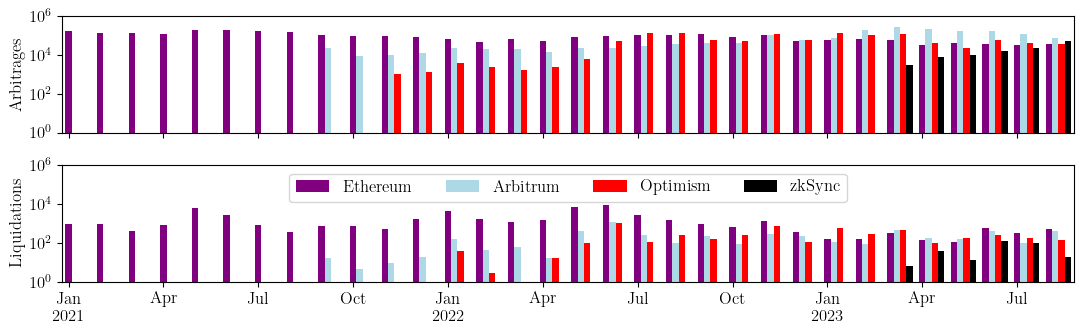

In [7]:
params = {'text.usetex' : True,
          'font.size' : 12,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params)

liq_arb_df, liq_opt_df, liq_eth_df, liq_zk_df = tuple(coll_to_df(rollup, coll) for rollup, label, coll in get_liq_collections())
arb_arb_df, arb_opt_df, arb_eth_df, arb_zk_df = tuple(coll_to_df(rollup, coll) for rollup, label, coll in get_arb_collections())

def count_by_month(df):
    return df.resample('ME', on='datetime').size().fillna(0)

arb_df = pd.DataFrame()
arb_df['ethereum'] = count_by_month(arb_eth_df)
arb_df['arbitrum'] = count_by_month(arb_arb_df)
arb_df['optimism'] = count_by_month(arb_opt_df)
arb_df['zksync'] = count_by_month(arb_zk_df)
arb_df = arb_df.fillna(0)
arb_df.index = arb_df.index.date

liq_df = pd.DataFrame()
liq_df['ethereum'] = count_by_month(liq_eth_df)
liq_df['arbitrum'] = count_by_month(liq_arb_df)
liq_df['optimism'] = count_by_month(liq_opt_df)
liq_df['zksync'] = count_by_month(liq_zk_df)
liq_df = liq_df.fillna(0)
liq_df.index = liq_df.index.date


# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11, 3.5))

bar_width = 0.2

# Calculate the positions of each bar
positions = range(len(liq_df.index))

for i, column in enumerate(liq_df.columns):
    ax1.bar([p + i * bar_width for p in positions], arb_df[column], width=bar_width, label=LABELS[i], color=COLORS[column])
    ax2.bar([p + i * bar_width for p in positions], liq_df[column], width=bar_width, label=LABELS[i], color=COLORS[column])


ax1.set_ylim(1, 10**6)
ax2.set_ylim(1, 10**6)
ax1.set_ylabel('Arbitrages')
ax2.set_ylabel('Liquidations')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.xlim(positions[0] - bar_width, positions[-1] + bar_width * len(liq_df.columns))

tick_positions = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
tick_labels = ['Jan\n2021', 'Apr', 'Jul', 'Oct', 'Jan\n2022', 'Apr', 'Jul', 'Oct', 'Jan\n2023', 'Apr', 'Jul']

plt.xticks(tick_positions, tick_labels)
ax2.legend(loc='upper center', ncol=4)
plt.tight_layout()

plt.savefig('figure_5.png', bbox_inches='tight', facecolor='white', transparent=True, dpi=1000)